(2003, 6)
[[0.01316509]
 [0.01457063]
 [0.01748985]
 ...
 [0.97658263]
 [0.99755134]
 [1.        ]]
1603
[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.0198430

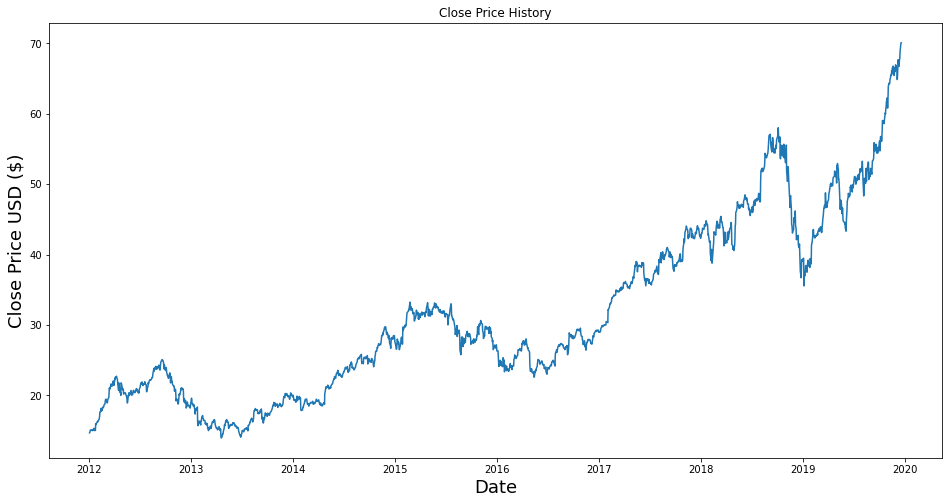

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pad
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2012-01-01', end='2019-12-17')
print(df.shape)
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.show()
data = df.filter(['Close'])
#print(df)
dataset = data.values


training_data_len = math.ceil(len(dataset) * .8)
#print(dataset)
#print(training_data_len)

#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)
"""
Spyder Editor

This is a temporary script file.
"""
train_data = scaled_data[0:training_data_len, :]
#x_train and y_train
x_train =[]
y_train =[]

print(len(train_data))
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <=61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)


In [4]:
test_data = scaled_data[training_data_len -60: , :]
x_test =[]
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [5]:
x_test = np.array(x_test)

In [6]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [7]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

In [9]:
rmse = np.sqrt(np.mean(pred-y_test)**2)
rmse

2.0230551815032958

C:\Users\thabo.teffu\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


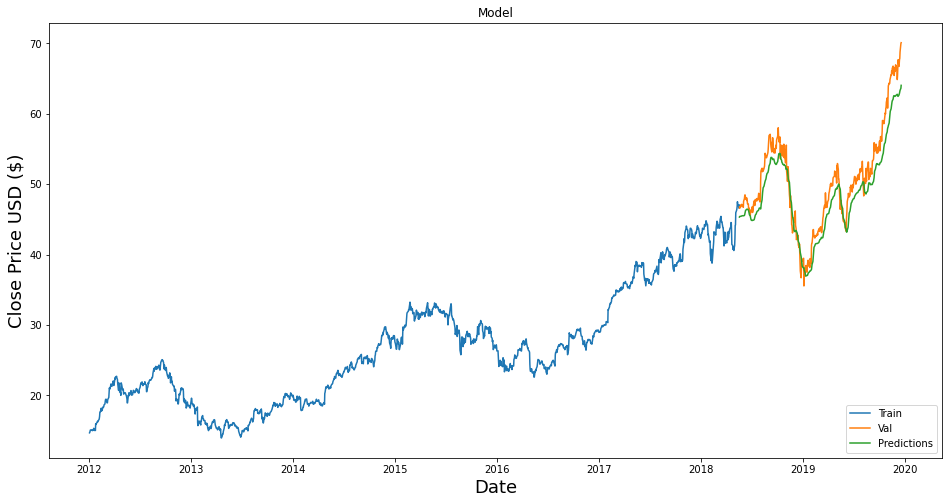

In [12]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= pred

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [14]:
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,45.338432
2018-05-18,46.577499,45.420013
2018-05-21,46.907501,45.435604
2018-05-22,46.790001,45.451405
2018-05-23,47.090000,45.449173
...,...,...
2019-12-11,67.692497,62.924480
2019-12-12,67.864998,63.120728
2019-12-13,68.787498,63.331577


In [17]:
apple_quote= web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
new_df =apple_quote.filter(['Close'])

last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)
X_test =[]

X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[64.47665]]


In [18]:
apple_quote2= web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
print(apple_quote2['Close'])

Date
2012-01-03    14.686786
2012-01-04    14.765714
2012-01-05    14.929643
2012-01-06    15.085714
2012-01-09    15.061786
                ...    
2019-12-11    67.692497
2019-12-12    67.864998
2019-12-13    68.787498
2019-12-16    69.964996
2019-12-17    70.102501
Name: Close, Length: 2003, dtype: float64
